In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras import layers
from keras.models import Sequential
import matplotlib.pyplot as plt
from keras.utils import pad_sequences

In [2]:
max_features=10000
maxlen=500

(x_train,y_train),(x_test,y_test)=imdb.load_data(num_words=max_features)

x_train=[x[::-1] for x in x_train]
x_test=[x[::-1] for x in x_test]#odwracanie sekwencji

#blokowanie sekwencji
x_train=pad_sequences(x_train,maxlen=maxlen)
x_test=pad_sequences(x_test,maxlen=maxlen)


In [3]:
model=Sequential()
model.add(layers.Embedding(max_features,128))
model.add(layers.LSTM(32))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history=model.fit(x_train,y_train,
                  epochs=10,
                  batch_size=128,
                  validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 48s 292ms/step - loss: 0.6073 - acc: 0.6552 - val_loss: 0.5042 - val_acc: 0.7810
Epoch 2/10
157/157 [==============================] - 45s 287ms/step - loss: 0.4098 - acc: 0.8296 - val_loss: 0.3586 - val_acc: 0.8644
Epoch 3/10
157/157 [==============================] - 45s 287ms/step - loss: 0.3208 - acc: 0.8755 - val_loss: 0.4920 - val_acc: 0.8556
Epoch 4/10
157/157 [==============================] - 45s 286ms/step - loss: 0.2716 - acc: 0.9008 - val_loss: 0.3245 - val_acc: 0.8740
Epoch 5/10
157/157 [==============================] - 47s 297ms/step - loss: 0.2414 - acc: 0.9119 - val_loss: 0.3417 - val_acc: 0.8642
Epoch 6/10
157/157 [==============================] - 47s 298ms/step - loss: 0.2154 - acc: 0.9241 - val_loss: 0.3622 - val_acc: 0.8658
Epoch 7/10
157/157 [==============================] - 45s 289ms/step - loss: 0.1888 - acc: 0.9329 - val_loss: 0.4154 - val_acc: 0.8696
Epoch 8/10
157/157 [==============================] - 4

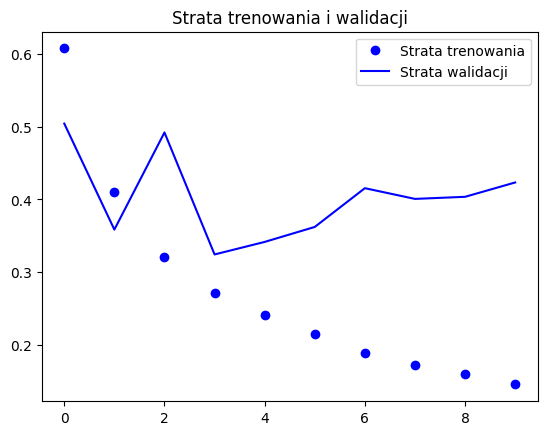

In [4]:
loss= history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(loss))

plt.figure()
plt.plot(epochs, loss,'bo',label='Strata trenowania')
plt.plot(epochs, val_loss,'b',label='Strata walidacji')
plt.title('Strata trenowania i walidacji')
plt.legend()
plt.show()

In [5]:
#tronowanie i walidacja 2 kierunkowa
model=Sequential()
model.add(layers.Embedding(max_features,32))
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history=model.fit(x_train,y_train,
                  epochs=10,
                  batch_size=128,
                  validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 50s 294ms/step - loss: 0.6885 - acc: 0.5339 - val_loss: 0.6532 - val_acc: 0.6376
Epoch 2/10
157/157 [==============================] - 44s 281ms/step - loss: 0.5236 - acc: 0.7610 - val_loss: 0.4183 - val_acc: 0.8352
Epoch 3/10
157/157 [==============================] - 45s 286ms/step - loss: 0.3645 - acc: 0.8548 - val_loss: 0.5510 - val_acc: 0.8192
Epoch 4/10
157/157 [==============================] - 48s 304ms/step - loss: 0.2970 - acc: 0.8880 - val_loss: 0.3255 - val_acc: 0.8728
Epoch 5/10
157/157 [==============================] - 48s 304ms/step - loss: 0.2512 - acc: 0.9082 - val_loss: 0.3234 - val_acc: 0.8818
Epoch 6/10
157/157 [==============================] - 47s 301ms/step - loss: 0.2293 - acc: 0.9168 - val_loss: 0.3306 - val_acc: 0.8834
Epoch 7/10
157/157 [==============================] - 48s 303ms/step - loss: 0.1955 - acc: 0.9316 - val_loss: 0.4443 - val_acc: 0.8682
Epoch 8/10
157/157 [==============================] - 4

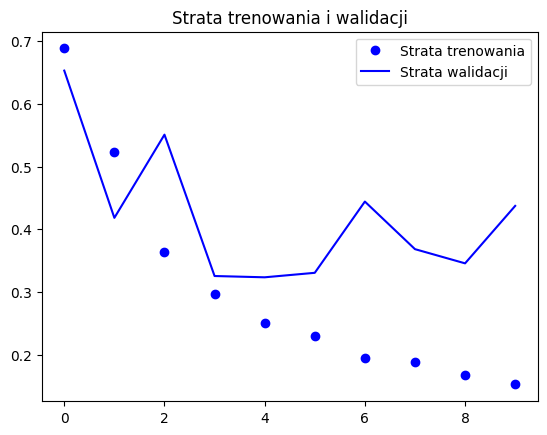

In [6]:
loss= history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(loss))

plt.figure()
plt.plot(epochs, loss,'bo',label='Strata trenowania')
plt.plot(epochs, val_loss,'b',label='Strata walidacji')
plt.title('Strata trenowania i walidacji')
plt.legend()
plt.show()

In [7]:
# #tronowanie i walidacja 2 kierunkowa GRU
# from keras.optimizers import RMSprop

# model=Sequential()
# # model.add(layers.Embedding(max_features,32))
# model.add(layers.Bidirectional(layers.GRU(32),input_shape=(None,float_data.shape[-1])))
# model.add(layers.Dense(1))

# model.compile(optimizer=RMSprop,
#               loss='mae')

# history=model.fit(x_train,y_train,
#                   epochs=10,
#                   batch_size=128,
#                   validation_split=0.2)

In [8]:
# loss= history.history['loss']
# val_loss=history.history['val_loss']

# epochs=range(len(loss))

# plt.figure()
# plt.plot(epochs, loss,'bo',label='Strata trenowania')
# plt.plot(epochs, val_loss,'b',label='Strata walidacji')
# plt.title('Strata trenowania i walidacji')
# plt.legend()
# plt.show()